In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from math import *

#### Concatenate Files

In [17]:
files = [file for file in os.listdir("./201719Data")]
all_years_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./201719Data/"+file)
    all_years_data = pd.concat([all_years_data, df])

all_years_data.to_csv("201719Boston.csv", index=False)

In [2]:
all_data = pd.read_csv("201719Boston.csv")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
all_data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Unnamed: 0
0,200.0,2017-12-01 00:02:02,2017-12-01 00:05:22,160.0,Wentworth Institute of Technology - Huntington...,42.337586,-71.096271,12.0,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,42.336244,-71.087986,1938.0,Subscriber,1982,0.0,NaN
1,365.0,2017-12-01 00:06:14,2017-12-01 00:12:20,226.0,Commonwealth Ave At Babcock St,42.351547,-71.121262,10.0,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279,57.0,Subscriber,1997,1.0,NaN
2,297.0,2017-12-01 00:09:08,2017-12-01 00:14:06,74.0,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,76.0,Central Sq Post Office / Cambridge City Hall a...,42.366426,-71.105495,1201.0,Subscriber,1977,1.0,NaN
3,1128.0,2017-12-01 00:09:36,2017-12-01 00:28:24,46.0,Christian Science Plaza - Massachusetts Ave at...,42.343666,-71.085824,130.0,Upham's Corner TEMPORARY WINTER LOCATION,42.317509,-71.064166,1148.0,Subscriber,1991,1.0,NaN
4,2594.0,2017-12-01 00:10:47,2017-12-01 00:54:01,193.0,Brookline Village - Station Street @ MBTA TEMP...,42.333765,-71.120464,32.0,Landmark Center - Brookline Ave at Park Dr,42.345194,-71.101697,1712.0,Subscriber,1963,1.0,NaN


#### Keep necessary columns and remove the rest

In [4]:
del all_data['start station id']
del all_data['start station latitude']
del all_data['start station longitude']
del all_data['end station latitude']
del all_data['end station longitude']
del all_data['end station id']
del all_data['Unnamed: 0']

In [5]:
all_data.head()

,tripduration,starttime,stoptime,start station name,end station name,bikeid,usertype,birth year,gender
0,200.0,2017-12-01 00:02:02,2017-12-01 00:05:22,Wentworth Institute of Technology - Huntington...,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,1938.0,Subscriber,1982,0.0
1,365.0,2017-12-01 00:06:14,2017-12-01 00:12:20,Commonwealth Ave At Babcock St,B.U. Central - 725 Comm. Ave.,57.0,Subscriber,1997,1.0
2,297.0,2017-12-01 00:09:08,2017-12-01 00:14:06,Harvard Square at Mass Ave/ Dunster,Central Sq Post Office / Cambridge City Hall a...,1201.0,Subscriber,1977,1.0
3,1128.0,2017-12-01 00:09:36,2017-12-01 00:28:24,Christian Science Plaza - Massachusetts Ave at...,Upham's Corner TEMPORARY WINTER LOCATION,1148.0,Subscriber,1991,1.0
4,2594.0,2017-12-01 00:10:47,2017-12-01 00:54:01,Brookline Village - Station Street @ MBTA TEMP...,Landmark Center - Brookline Ave at Park Dr,1712.0,Subscriber,1963,1.0


In [6]:
all_data['starttime'] = pd.to_datetime(all_data["starttime"])
all_data['stoptime'] = pd.to_datetime(all_data["stoptime"])
all_data['year'] = all_data["starttime"].dt.year
all_data['month'] = all_data["starttime"].dt.month

In [7]:
all_data.head()

,tripduration,starttime,stoptime,start station name,end station name,bikeid,usertype,birth year,gender,year,month
0,200.0,2017-12-01 00:02:02,2017-12-01 00:05:22,Wentworth Institute of Technology - Huntington...,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,1938.0,Subscriber,1982,0.0,2017,12
1,365.0,2017-12-01 00:06:14,2017-12-01 00:12:20,Commonwealth Ave At Babcock St,B.U. Central - 725 Comm. Ave.,57.0,Subscriber,1997,1.0,2017,12
2,297.0,2017-12-01 00:09:08,2017-12-01 00:14:06,Harvard Square at Mass Ave/ Dunster,Central Sq Post Office / Cambridge City Hall a...,1201.0,Subscriber,1977,1.0,2017,12
3,1128.0,2017-12-01 00:09:36,2017-12-01 00:28:24,Christian Science Plaza - Massachusetts Ave at...,Upham's Corner TEMPORARY WINTER LOCATION,1148.0,Subscriber,1991,1.0,2017,12
4,2594.0,2017-12-01 00:10:47,2017-12-01 00:54:01,Brookline Village - Station Street @ MBTA TEMP...,Landmark Center - Brookline Ave at Park Dr,1712.0,Subscriber,1963,1.0,2017,12


In [8]:
all_data['start_hour'] = all_data['starttime'].dt.hour
all_data['day_of_week'] = all_data['starttime'].dt.day_name()
all_data.head()

,tripduration,starttime,stoptime,start station name,end station name,bikeid,usertype,birth year,gender,year,month,start_hour,day_of_week
0,200.0,2017-12-01 00:02:02,2017-12-01 00:05:22,Wentworth Institute of Technology - Huntington...,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,1938.0,Subscriber,1982,0.0,2017,12,0,Friday
1,365.0,2017-12-01 00:06:14,2017-12-01 00:12:20,Commonwealth Ave At Babcock St,B.U. Central - 725 Comm. Ave.,57.0,Subscriber,1997,1.0,2017,12,0,Friday
2,297.0,2017-12-01 00:09:08,2017-12-01 00:14:06,Harvard Square at Mass Ave/ Dunster,Central Sq Post Office / Cambridge City Hall a...,1201.0,Subscriber,1977,1.0,2017,12,0,Friday
3,1128.0,2017-12-01 00:09:36,2017-12-01 00:28:24,Christian Science Plaza - Massachusetts Ave at...,Upham's Corner TEMPORARY WINTER LOCATION,1148.0,Subscriber,1991,1.0,2017,12,0,Friday
4,2594.0,2017-12-01 00:10:47,2017-12-01 00:54:01,Brookline Village - Station Street @ MBTA TEMP...,Landmark Center - Brookline Ave at Park Dr,1712.0,Subscriber,1963,1.0,2017,12,0,Friday


In [9]:
all_data['tripduration'] = all_data['tripduration']/60
all_data.head()

,tripduration,starttime,stoptime,start station name,end station name,bikeid,usertype,birth year,gender,year,month,start_hour,day_of_week
0,3.333333,2017-12-01 00:02:02,2017-12-01 00:05:22,Wentworth Institute of Technology - Huntington...,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,1938.0,Subscriber,1982,0.0,2017,12,0,Friday
1,6.083333,2017-12-01 00:06:14,2017-12-01 00:12:20,Commonwealth Ave At Babcock St,B.U. Central - 725 Comm. Ave.,57.0,Subscriber,1997,1.0,2017,12,0,Friday
2,4.950000,2017-12-01 00:09:08,2017-12-01 00:14:06,Harvard Square at Mass Ave/ Dunster,Central Sq Post Office / Cambridge City Hall a...,1201.0,Subscriber,1977,1.0,2017,12,0,Friday
3,18.800000,2017-12-01 00:09:36,2017-12-01 00:28:24,Christian Science Plaza - Massachusetts Ave at...,Upham's Corner TEMPORARY WINTER LOCATION,1148.0,Subscriber,1991,1.0,2017,12,0,Friday
4,43.233333,2017-12-01 00:10:47,2017-12-01 00:54:01,Brookline Village - Station Street @ MBTA TEMP...,Landmark Center - Brookline Ave at Park Dr,1712.0,Subscriber,1963,1.0,2017,12,0,Friday


In [10]:
all_data['tripduration'].describe()

count    5.604117e+06
mean     2.388810e+01
std      3.962715e+02
min      1.016667e+00
25%      6.833333e+00
50%      1.151667e+01
75%      1.925000e+01
max      1.554760e+05
Name: tripduration, dtype: float64

In [11]:
#Based on the pricing system I'd expect the majority of rides to be under 2 hours
#and no longer than 4 hours
no_outliers_data = all_data[all_data['tripduration'] < 240]
no_outliers_data.head()

,tripduration,starttime,stoptime,start station name,end station name,bikeid,usertype,birth year,gender,year,month,start_hour,day_of_week
0,3.333333,2017-12-01 00:02:02,2017-12-01 00:05:22,Wentworth Institute of Technology - Huntington...,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,1938.0,Subscriber,1982,0.0,2017,12,0,Friday
1,6.083333,2017-12-01 00:06:14,2017-12-01 00:12:20,Commonwealth Ave At Babcock St,B.U. Central - 725 Comm. Ave.,57.0,Subscriber,1997,1.0,2017,12,0,Friday
2,4.950000,2017-12-01 00:09:08,2017-12-01 00:14:06,Harvard Square at Mass Ave/ Dunster,Central Sq Post Office / Cambridge City Hall a...,1201.0,Subscriber,1977,1.0,2017,12,0,Friday
3,18.800000,2017-12-01 00:09:36,2017-12-01 00:28:24,Christian Science Plaza - Massachusetts Ave at...,Upham's Corner TEMPORARY WINTER LOCATION,1148.0,Subscriber,1991,1.0,2017,12,0,Friday
4,43.233333,2017-12-01 00:10:47,2017-12-01 00:54:01,Brookline Village - Station Street @ MBTA TEMP...,Landmark Center - Brookline Ave at Park Dr,1712.0,Subscriber,1963,1.0,2017,12,0,Friday


In [12]:
no_outliers_data['tripduration'].describe()

count    5.588514e+06
mean     1.613151e+01
std      1.742069e+01
min      1.016667e+00
25%      6.816667e+00
50%      1.148333e+01
75%      1.915000e+01
max      2.399833e+02
Name: tripduration, dtype: float64

In [13]:
#Calculate distance between start and end stations using long and lat
#no_outliers_data['distance'] = 6371*np.arccos(np.cos(np.radians(float(90)-no_outliers_data['start station latitude']))*np.cos(np.radians(float(90)-no_outliers_data['end station latitude']))+np.sin(np.radians(float(90)-no_outliers_data['start station latitude']))*np.sin(np.radians(float(90)-no_outliers_data['end station latitude']))*np.cos(np.radians(no_outliers_data['start station longitude']-no_outliers_data['end station longitude'])))/1.609

In [14]:
# Save cleaned data to a csv file to begin analysis
cleaned_data = no_outliers_data
cleaned_data.to_csv("201719BostonCleaned.csv", index=False)

#### Start of Data Analysis

In [2]:
data = pd.read_csv("201719BostonCleaned.csv")
data.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,tripduration,starttime,stoptime,start station name,end station name,bikeid,usertype,birth year,gender,year,month,start_hour,day_of_week
0,3.333333,2017-12-01 00:02:02,2017-12-01 00:05:22,Wentworth Institute of Technology - Huntington...,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,1938.0,Subscriber,1982,0.0,2017,12,0,Friday
1,6.083333,2017-12-01 00:06:14,2017-12-01 00:12:20,Commonwealth Ave At Babcock St,B.U. Central - 725 Comm. Ave.,57.0,Subscriber,1997,1.0,2017,12,0,Friday
2,4.950000,2017-12-01 00:09:08,2017-12-01 00:14:06,Harvard Square at Mass Ave/ Dunster,Central Sq Post Office / Cambridge City Hall a...,1201.0,Subscriber,1977,1.0,2017,12,0,Friday
3,18.800000,2017-12-01 00:09:36,2017-12-01 00:28:24,Christian Science Plaza - Massachusetts Ave at...,Upham's Corner TEMPORARY WINTER LOCATION,1148.0,Subscriber,1991,1.0,2017,12,0,Friday
4,43.233333,2017-12-01 00:10:47,2017-12-01 00:54:01,Brookline Village - Station Street @ MBTA TEMP...,Landmark Center - Brookline Ave at Park Dr,1712.0,Subscriber,1963,1.0,2017,12,0,Friday


#### RIDER DEMOGRAPHICS

In [6]:
# Create dataframes for each year
grouped = data.groupby(data['year'])
df1 = grouped.get_group(2017)
df2 = grouped.get_group(2018)
df3 = grouped.get_group(2019)

In [7]:
genders = data['gender'].value_counts().keys().to_list()
counts = data['gender'].value_counts().tolist()

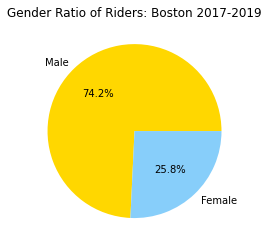

In [9]:
#Gender: 0=Unknown, 1=Male, 2=Female
plt.pie(counts[0:2], labels=['Male', 'Female'], colors = ['gold', 'lightskyblue'], autopct='%1.1f%%')
plt.title('Gender Ratio of Riders: Boston 2017-2019')
plt.show()
# based on users that provided their gender

In [11]:
users = data['usertype'].value_counts().keys().to_list()
count = data['usertype'].value_counts().to_list()

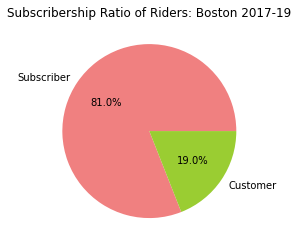

In [12]:
plt.pie(count, labels=users, colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Subscribership Ratio of Riders: Boston 2017-19")
plt.show()

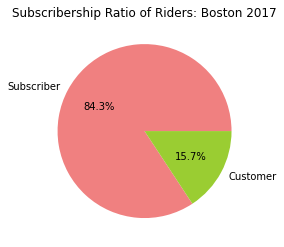

In [13]:
users_17 = df1['usertype'].value_counts().keys().to_list()
count_17 = df1['usertype'].value_counts().to_list()

plt.pie(count_17, labels=users_17, colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Subscribership Ratio of Riders: Boston 2017")
plt.show()


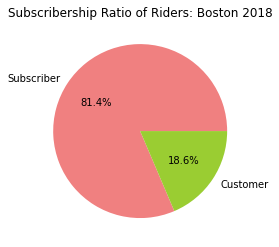

In [14]:
users_18 = df2['usertype'].value_counts().keys().to_list()
count_18 = df2['usertype'].value_counts().to_list()

plt.pie(count_18, labels=users_18, colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Subscribership Ratio of Riders: Boston 2018")
plt.show()

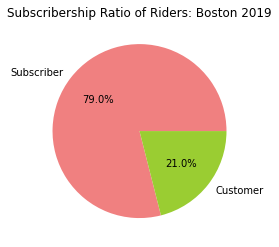

In [15]:
users_19 = df3['usertype'].value_counts().keys().to_list()
count_19 = df3['usertype'].value_counts().to_list()

plt.pie(count_19, labels=users_19, colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Subscribership Ratio of Riders: Boston 2019")
plt.show()

In [16]:
birth_dict = dict(zip(data['birth year'].value_counts().keys().to_list(), data['birth year'].value_counts().to_list()))
#Remove birth years that don't make sense (any age more than 80 is removed)
cleaned_birth = {}
for key in birth_dict:
    if(type(key)==int):
        if(key>=1939):
            cleaned_birth[key]=birth_dict[key]

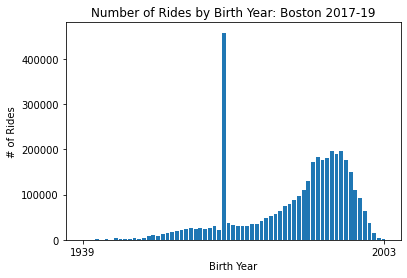

In [17]:
plt.bar(list(cleaned_birth.keys()), list(cleaned_birth.values()))
plt.xticks((1939,2003))
plt.xlabel("Birth Year")
plt.ylabel("# of Rides")
plt.title("Number of Rides by Birth Year: Boston 2017-19")
plt.show()

#### RIDES PER YEAR

In [18]:
#track ridership per year
years = data['year'].value_counts().keys().to_list()
rides = data['year'].value_counts().to_list()

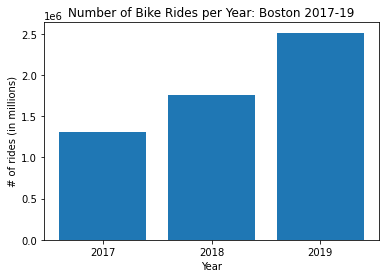

In [19]:
plt.bar(years, rides)
plt.xticks(years)
plt.xlabel("Year")
plt.ylabel("# of rides (in millions)")
plt.title("Number of Bike Rides per Year: Boston 2017-19")
plt.show()

#### BIKES IN SYSTEM

In [20]:
num_bikes_year =[]
num_bikes1 = len(df1['bikeid'].unique())
num_bikes_year.append(num_bikes1)

In [21]:
df2.head()
num_bikes2 = len(df2['bikeid'].unique())
num_bikes_year.append(num_bikes2)

In [22]:
df3.head()
num_bikes3 = len(df3['bikeid'].unique())
num_bikes_year.append(num_bikes3)

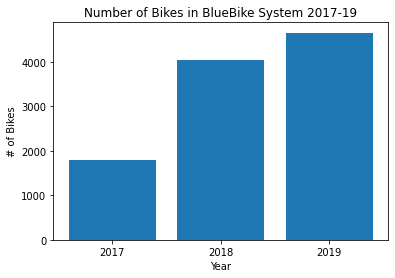

In [23]:
plt.bar([2017, 2018, 2019], num_bikes_year)
plt.xticks([2017, 2018, 2019])
plt.xlabel("Year")
plt.ylabel("# of Bikes")
plt.title("Number of Bikes in Boston System 2017-19")
plt.show()

#### DAYS OF WEEK AND HOURS

In [24]:
#track rides by day of week over 3 year period
days = data['day_of_week'].value_counts().keys().to_list()
rides = data['day_of_week'].value_counts().to_list()
#Hardcoded the sorting into order of the week
days_sorted = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rides_sorted = [816105,850982,884699,878458,855852,677454,624964]

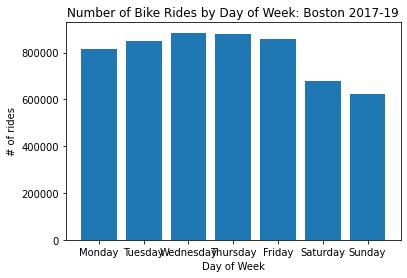

In [25]:
plt.bar(days_sorted, rides_sorted)
plt.xticks(days_sorted)
plt.xlabel("Day of Week")
plt.ylabel("# of rides")
plt.title("Number of Bike Rides by Day of Week: Boston 2017-19")
plt.show()

In [26]:
#Make a data frame for weekdays and weekend
mask = data['day_of_week'].isin(['Saturday','Sunday'])
weekend_df=data[mask]
weekday_df=data[~mask]

In [27]:
weekend_hours = weekend_df['start_hour'].value_counts().keys().to_list()
weekend_count = weekend_df['start_hour'].value_counts().to_list()

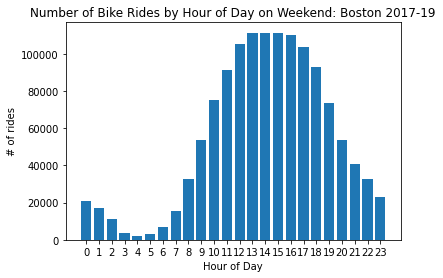

In [28]:
plt.bar(weekend_hours, weekend_count)
plt.xticks(weekend_hours)
plt.xlabel("Hour of Day")
plt.ylabel("# of rides")
plt.title("Number of Bike Rides by Hour of Day on Weekend: Boston 2017-19")
plt.show()

In [29]:
weekday_hours = weekday_df['start_hour'].value_counts().keys().to_list()
weekday_count = weekday_df['start_hour'].value_counts().to_list()

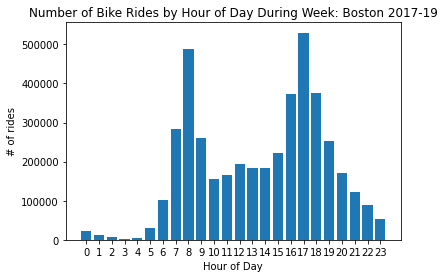

In [30]:
plt.bar(weekday_hours, weekday_count)
plt.xticks(weekday_hours)
plt.xlabel("Hour of Day")
plt.ylabel("# of rides")
plt.title("Number of Bike Rides by Hour of Day During Week: Boston 2017-19")
plt.show()

In [31]:
weekend_dict = dict(zip(weekend_hours, weekend_count))
weekend_keys = (list(weekend_dict.keys()))
weekend_keys.sort()

weekend_sorted={}
for e in weekend_keys:
    weekend_sorted[e]=weekend_dict[e]

weekend_keys = list(weekend_sorted.keys())
weekend_values = list(weekend_sorted.values())

In [32]:
weekday_dict = dict(zip(weekday_hours, weekday_count))
weekday_keys = (list(weekday_dict.keys()))
weekday_keys.sort()

weekday_sorted={}
for e in weekday_keys:
    weekday_sorted[e]=weekday_dict[e]

weekday_keys = list(weekday_sorted.keys())
weekday_values = list(weekday_sorted.values())

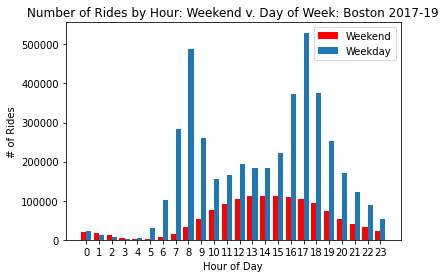

In [33]:
x = np.arange(len(weekend_keys))
ax = plt.subplot(111)
ax.bar(x-0.2, weekend_values, width=0.4, color='r', align='center', label='Weekend')
ax.bar(x+0.2, weekday_values, width=0.4, align='center', label='Weekday')
plt.xticks(weekend_keys)
plt.xlabel('Hour of Day')
plt.ylabel('# of Rides')
plt.title('Number of Rides by Hour: Weekend v. Day of Week: Boston 2017-19')
plt.legend(loc = 'best')
plt.show()

#### MONTHS

In [34]:
#track rides by month over 3 year period
months = data['month'].value_counts().keys().to_list()
num_riders = data['month'].value_counts().to_list()

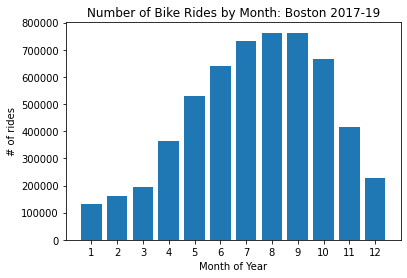

In [35]:
plt.bar(months, num_riders)
plt.xticks(months)
plt.xlabel("Month of Year")
plt.ylabel("# of rides")
plt.title("Number of Bike Rides by Month: Boston 2017-19")
plt.show()

#### START/END STATIONS

In [36]:
#track most common and least common start stations over 3 year period
start_stations = data['start station name'].value_counts().keys().to_list()
num_start = data['start station name'].value_counts().to_list()

start_dict = dict(zip(start_stations, num_start))

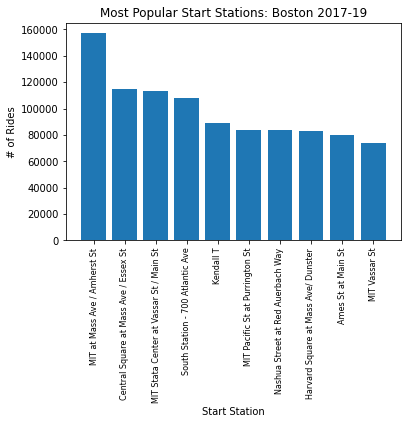

In [37]:
plt.bar(start_stations[0:10], num_start[0:10])
plt.xticks(start_stations[0:10], rotation='vertical', size=8)
plt.xlabel("Start Station")
plt.ylabel("# of Rides")
plt.title("Most Popular Start Stations: Boston 2017-19")
plt.show()

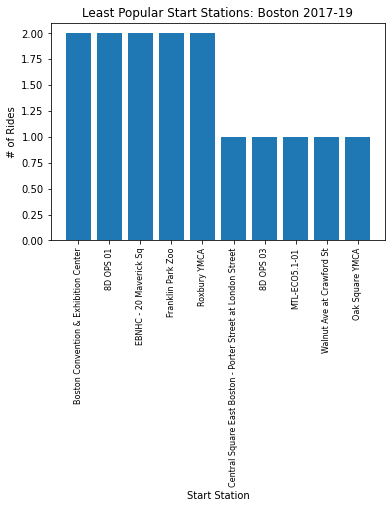

In [38]:
plt.bar(start_stations[-10:], num_start[-10:])
plt.xticks(start_stations[-10:], rotation='vertical', size=8)
plt.xlabel("Start Station")
plt.ylabel("# of Rides")
plt.title("Least Popular Start Stations: Boston 2017-19")
plt.show()

In [39]:
#track most common and leas common end stations over 3 year period
end_stations = data['end station name'].value_counts().keys().to_list()
num_end = data['end station name'].value_counts().to_list()

end_dict = dict(zip(end_stations, num_end))

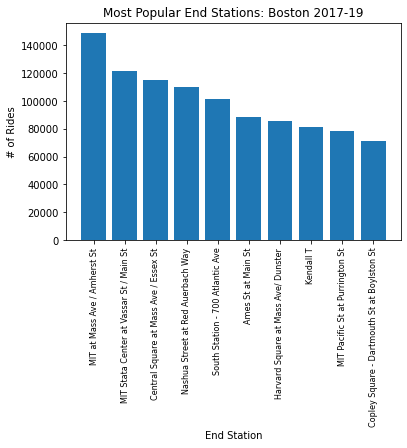

In [40]:
plt.bar(end_stations[0:10], num_end[0:10])
plt.xticks(end_stations[0:10], rotation='vertical', size=8)
plt.xlabel("End Station")
plt.ylabel("# of Rides")
plt.title("Most Popular End Stations: Boston 2017-19")
plt.show()

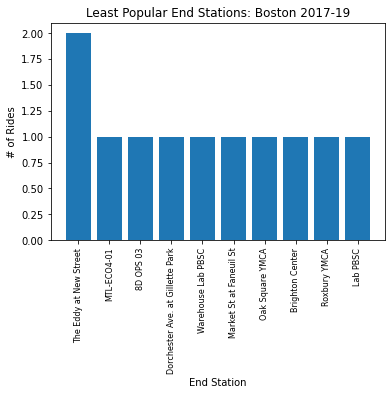

In [41]:
plt.bar(end_stations[-10:], num_end[-10:])
plt.xticks(end_stations[-10:], rotation='vertical', size=8)
plt.xlabel("End Station")
plt.ylabel("# of Rides")
plt.title("Least Popular End Stations: Boston 2017-19")
plt.show()

In [42]:
#combine start and end dicts and sort by value
def combine(d1, d2):
    new_dict=d1
    for key in d2:
        if key in new_dict:
            new_dict[key] += d2[key]
        else:
            new_dict[key]=d2[key]
    return new_dict

#Sort overall dict by value in increasing order to identify top and bottom stations
overall_dict = combine(start_dict, end_dict)
overall_dict={k: v for k, v in sorted(overall_dict.items(), key=lambda item: item[1])}


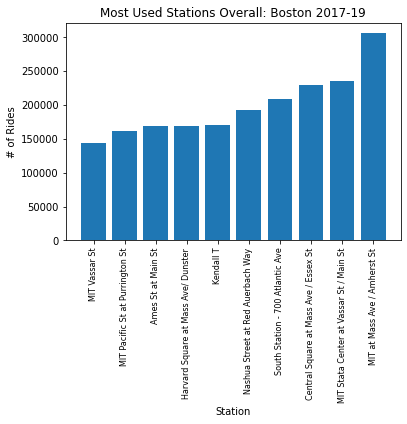

In [43]:
plt.bar((list(overall_dict.keys()))[-10:], (list(overall_dict.values()))[-10:])
plt.xticks((list(overall_dict.keys()))[-10:], rotation='vertical', size=8)
plt.xlabel("Station")
plt.ylabel("# of Rides")
plt.title("Most Used Stations Overall: Boston 2017-19")
plt.show()


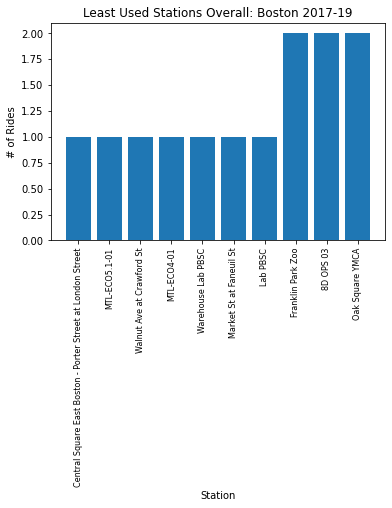

In [44]:
plt.bar((list(overall_dict.keys()))[0:10], (list(overall_dict.values()))[0:10])
plt.xticks((list(overall_dict.keys()))[0:10], rotation='vertical', size=8)
plt.xlabel("Station")
plt.ylabel("# of Rides")
plt.title("Least Used Stations Overall: Boston 2017-19")
plt.show()

In [45]:
#How does the number of stations change?
num_stations=[]
stations_2017 = len(list(pd.concat([df1['start station name'], df1['end station name']]).unique()))
num_stations.append(stations_2017)

In [46]:
stations_2018 = len(list(pd.concat([df2['start station name'], df2['end station name']]).unique()))
num_stations.append(stations_2018)

In [47]:
stations_2019 = len(list(pd.concat([df3['start station name'], df3['end station name']]).unique()))
num_stations.append(stations_2019)

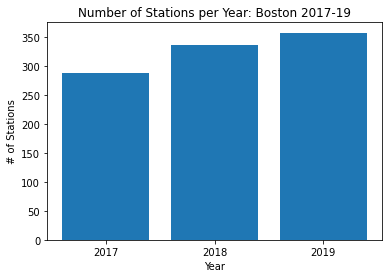

In [48]:
plt.bar([2017,2018,2019], num_stations)
plt.xticks([2017,2018,2019])
plt.xlabel("Year")
plt.ylabel("# of Stations")
plt.title("Number of Stations per Year: Boston 2017-19")
plt.show()

#### BIKE TRIP DURATION

In [49]:
#determine tripduration statistics (min, max, average, std, etc.)
data['tripduration'].describe()

count    5.588514e+06
mean     1.613151e+01
std      1.742069e+01
min      1.016667e+00
25%      6.816667e+00
50%      1.148333e+01
75%      1.915000e+01
max      2.399833e+02
Name: tripduration, dtype: float64

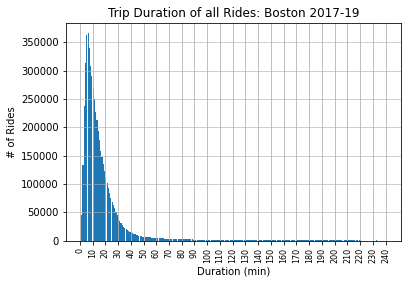

In [50]:
times = data['tripduration']
times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of all Rides: Boston 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

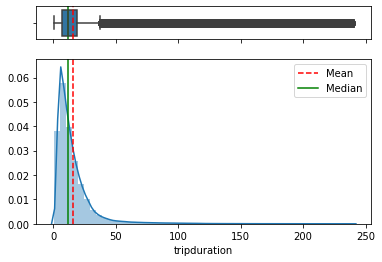

In [51]:
#Box plot and Dist plot with mean and median lines
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=data['tripduration'].mean()
median=data['tripduration'].median()

sns.boxplot(data['tripduration'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(data['tripduration'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

In [52]:
#Subcriber v Customer Rides
grouped_user = data.groupby(data['usertype'])
df_sub = grouped_user.get_group('Subscriber')
df_cust = grouped_user.get_group('Customer')

In [53]:
df_sub['tripduration'].describe()

count    4.525753e+06
mean     1.264268e+01
std      1.042219e+01
min      1.016667e+00
25%      6.250000e+00
50%      1.010000e+01
75%      1.615000e+01
max      2.398167e+02
Name: tripduration, dtype: float64

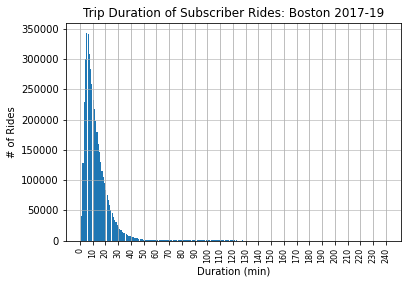

In [54]:
sub_times = df_sub['tripduration']
sub_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Subscriber Rides: Boston 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

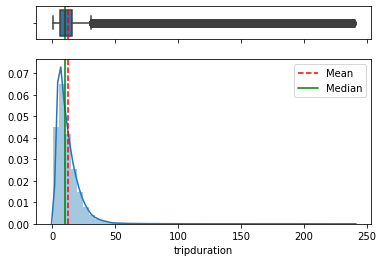

In [55]:
#Box plot and Dist plot with mean and median lines
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_sub['tripduration'].mean()
median=df_sub['tripduration'].median()

sns.boxplot(df_sub['tripduration'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(df_sub['tripduration'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

In [56]:
df_cust['tripduration'].describe()

count    1.062761e+06
mean     3.098862e+01
std      2.933795e+01
min      1.016667e+00
25%      1.310000e+01
50%      2.193333e+01
75%      3.631667e+01
max      2.399833e+02
Name: tripduration, dtype: float64

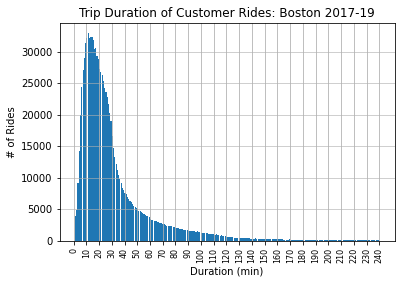

In [57]:
cust_times = df_cust['tripduration']
cust_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Customer Rides: Boston 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

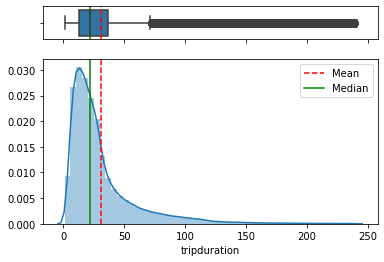

In [58]:
#Box plot and Dist plot with mean and median lines
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_cust['tripduration'].mean()
median=df_cust['tripduration'].median()

sns.boxplot(df_cust['tripduration'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(df_cust['tripduration'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

In [60]:
weekend_df['tripduration'].describe()

count    1.302418e+06
mean     2.092655e+01
std      2.302027e+01
min      1.016667e+00
25%      7.700000e+00
50%      1.406667e+01
75%      2.481667e+01
max      2.399833e+02
Name: tripduration, dtype: float64

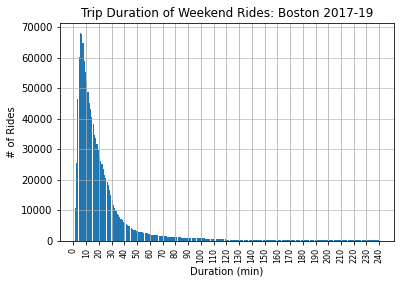

In [61]:
weekend_times = weekend_df['tripduration']
weekend_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Weekend Rides: Boston 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

In [62]:
weekday_df['tripduration'].describe()

count    4.286096e+06
mean     1.467444e+01
std      1.501861e+01
min      1.016667e+00
25%      6.616667e+00
50%      1.091667e+01
75%      1.775000e+01
max      2.399500e+02
Name: tripduration, dtype: float64

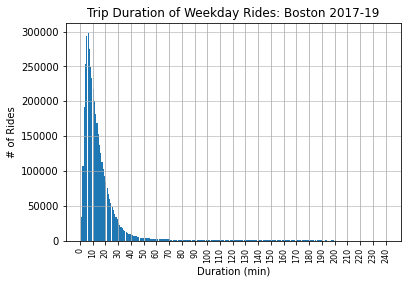

In [63]:
weekday_times = weekday_df['tripduration']
weekday_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Weekday Rides: Boston 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)